In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score
import random
import joblib
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [2]:
dataset = pd.read_csv('../Datasets/heart.csv')

In [3]:
dataset.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


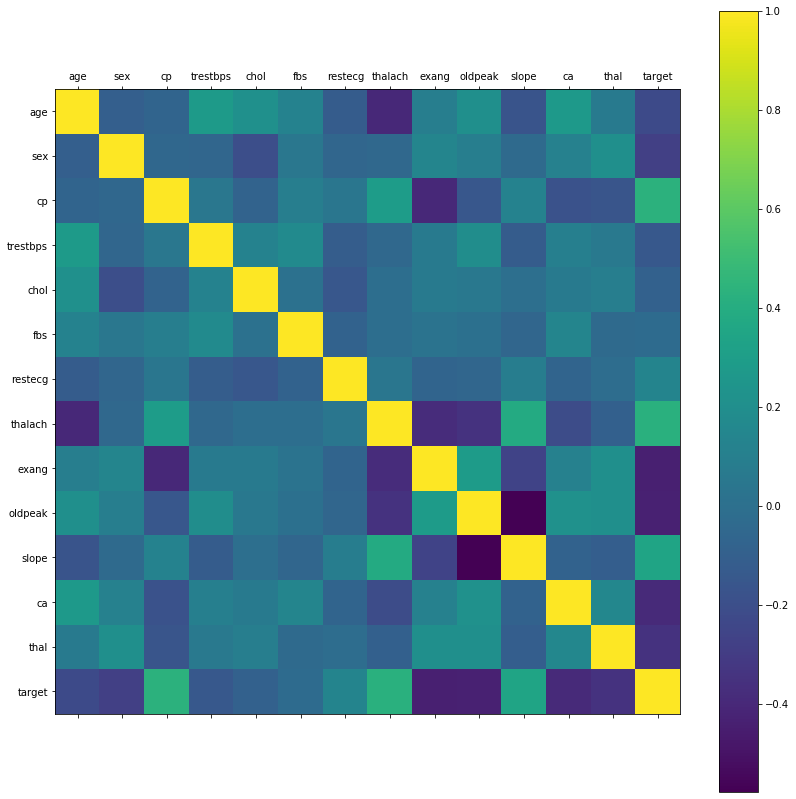

In [6]:
matplotlib.rcParams['figure.figsize'] = (20, 14)
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B3DDC3E508>,
      dtype=object)

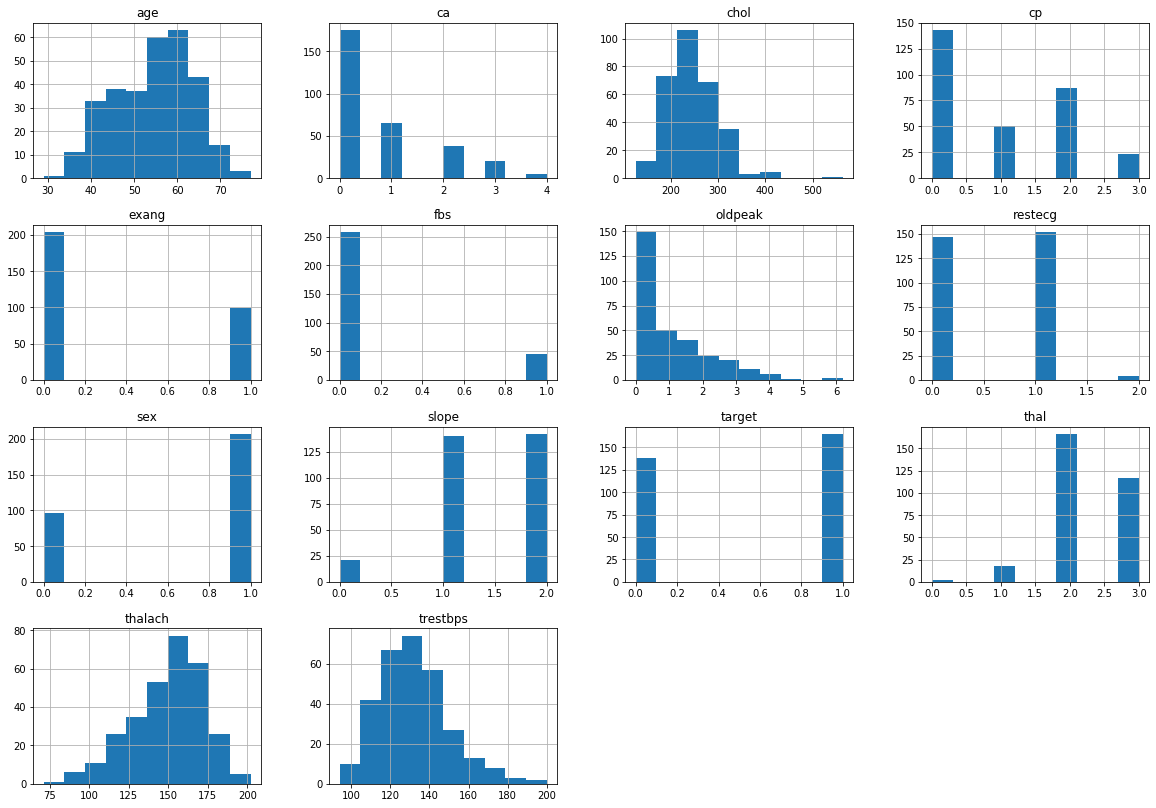

In [7]:
dataset.hist()

Text(0.5, 1.0, 'Count of each Target Class')

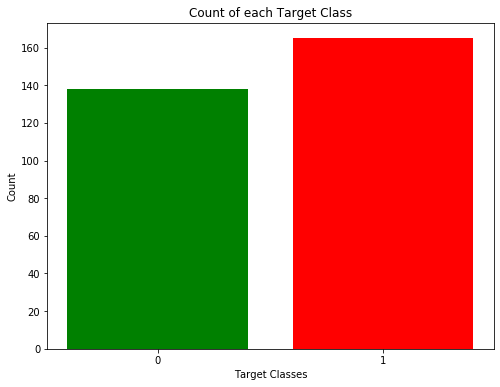

In [8]:
matplotlib.rcParams['figure.figsize'] = (8,6)
plt.bar(dataset['target'].unique(), dataset['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [9]:
dataset["trestbps"]=np.log(dataset["trestbps"])
dataset.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,4.976734,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,4.867534,250,0,1,187,0,3.5,0,0,2,1


In [10]:
dataset=dataset.drop(["fbs"],axis=1)
dataset=dataset.drop(["ca"],axis=1)
dataset["chol"]=np.log(dataset["chol"])
target=dataset["target"]
print(dataset.shape[1])

12


In [11]:
np.random.shuffle(dataset.values)
dataset=dataset.drop(["target"],axis=1)
print(dataset.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'thal'],
      dtype='object')


In [12]:
sc= StandardScaler()
dataset=sc.fit_transform(dataset)

### Logistic Regression 

In [13]:
lr=LogisticRegression()
lr.fit(dataset,target)

LogisticRegression()

In [14]:
cv_results = cross_validate(lr, dataset,target, cv=10)
print(cv_results)

{'fit_time': array([0.00894904, 0.02413249, 0.00198412, 0.01762748, 0.0127697 ,
       0.00865483, 0.006212  , 0.01144004, 0.00633359, 0.00823545]), 'score_time': array([0.00093341, 0.00124502, 0.        , 0.00098324, 0.        ,
       0.00312519, 0.00239873, 0.00099921, 0.00101876, 0.        ]), 'test_score': array([0.87096774, 0.74193548, 0.87096774, 0.83333333, 0.83333333,
       0.83333333, 0.9       , 0.8       , 0.73333333, 0.83333333])}


### SVM

In [15]:
svm_clf = svm.SVC()
param = {'C' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
         'kernel' : ['linear', 'poly', 'rbf'],
         'gamma' : ['scale', 'auto']
        }

clf = GridSearchCV(svm_clf, param, cv=5, verbose=5, n_jobs=3)
clf.fit(dataset,target)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:    4.0s
[Parallel(n_jobs=3)]: Done 237 tasks      | elapsed:    4.7s
[Parallel(n_jobs=3)]: Done 265 out of 270 | elapsed:    4.8s remaining:    0.0s
[Parallel(n_jobs=3)]: Done 270 out of 270 | elapsed:    4.8s finished


GridSearchCV(cv=5, estimator=SVC(), n_jobs=3,
             param_grid={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=5)

In [16]:
clf.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}

In [17]:
cv_result = pd.DataFrame(clf.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003640,0.001833,0.004328,0.003296,0.1,scale,linear,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}",0.770492,0.868852,0.819672,0.833333,0.766667,0.811803,0.038792,3
1,0.003151,0.001628,0.001687,0.001829,0.1,scale,poly,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}",0.721311,0.754098,0.770492,0.716667,0.716667,0.735847,0.022273,54
2,0.007137,0.002094,0.001637,0.001243,0.1,scale,rbf,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}",0.786885,0.836066,0.868852,0.833333,0.783333,0.821694,0.032401,1
3,0.005515,0.001058,0.001209,0.000328,0.1,auto,linear,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'linear'}",0.770492,0.868852,0.819672,0.833333,0.766667,0.811803,0.038792,3
4,0.004449,0.001840,0.001105,0.000664,0.1,auto,poly,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}",0.737705,0.754098,0.770492,0.716667,0.716667,0.739126,0.021066,53
5,0.005481,0.000548,0.001890,0.000233,0.1,auto,rbf,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}",0.786885,0.836066,0.868852,0.833333,0.783333,0.821694,0.032401,1
6,0.004132,0.000578,0.001270,0.000728,0.2,scale,linear,"{'C': 0.2, 'gamma': 'scale', 'kernel': 'linear'}",0.754098,0.868852,0.803279,0.833333,0.750000,0.801913,0.045719,27
7,0.004435,0.001067,0.001947,0.000526,0.2,scale,poly,"{'C': 0.2, 'gamma': 'scale', 'kernel': 'poly'}",0.803279,0.754098,0.819672,0.750000,0.733333,0.772077,0.033318,47
8,0.005226,0.000745,0.001876,0.000287,0.2,scale,rbf,"{'C': 0.2, 'gamma': 'scale', 'kernel': 'rbf'}",0.770492,0.836066,0.852459,0.833333,0.766667,0.811803,0.035914,3
9,0.004295,0.000996,0.001945,0.000509,0.2,auto,linear,"{'C': 0.2, 'gamma': 'auto', 'kernel': 'linear'}",0.754098,0.868852,0.803279,0.833333,0.750000,0.801913,0.045719,27


In [18]:
train_X,test_X,train_y,test_y = train_test_split(dataset,target, test_size=0.3, random_state=123, stratify=target)

In [19]:
svm_clf = svm.SVC(C=0.6, gamma='auto', kernel='rbf')
svm_clf.fit(train_X, train_y)
pred = svm_clf.predict(test_X)
print(accuracy_score(test_y, pred))

0.8241758241758241


In [20]:
svm_clf.support_vectors_

array([[-0.7021358 ,  0.68100522, -0.93851463, ..., -0.89686172,
         0.97635214,  1.12302895],
       [-0.26098049,  0.68100522, -0.93851463, ..., -0.03416616,
         0.97635214,  1.12302895],
       [ 0.84190778, -1.46841752, -0.93851463, ...,  0.31091206,
        -0.64911323, -0.51292188],
       ...,
       [ 1.06248543,  0.68100522, -0.93851463, ..., -0.7243226 ,
        -0.64911323,  1.12302895],
       [-0.15069166,  0.68100522, -0.93851463, ..., -0.89686172,
         0.97635214,  1.12302895],
       [-1.03300228,  0.68100522, -0.93851463, ...,  1.69122495,
        -0.64911323, -0.51292188]])

### Random Forest

In [21]:
randomforest_classifier= RandomForestClassifier(n_estimators=10)
score=cross_val_score(randomforest_classifier,dataset,target,cv=10)

In [22]:
score.mean()

0.7853763440860215

In [23]:
joblib.dump(lr,"../Models/heart_model")

['../Models/heart_model']